In [204]:
#imports
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

## Question 1

1. The dataset associated to this assignment was downloaded from www.hemnet.se on 
2020-10-18. The data contains information about selling prices of villas in Landvetter 
that were sold in the past 12 months.

a. Find a linear regression model that relates the living area to the selling price. 
If you did any data cleaning step(s), describe and explain why you did that.

We removed all redudant columns, and drop all NaN values to clean the data. We also in the regression plots below give two cases. As most data points seems to be balanced along the line, there are som anomalies that give away high variance. In the second regression plot we remove these points, minimizing the residuals.

In [205]:
#Load data into Dataframe
df = pd.read_csv('./data_assignment2.csv')

In [206]:
# remove rendundant columns, only using living area and selling price
df = df.iloc[:, [1, 6]]

In [207]:
# remove NaN values
df = df.dropna()

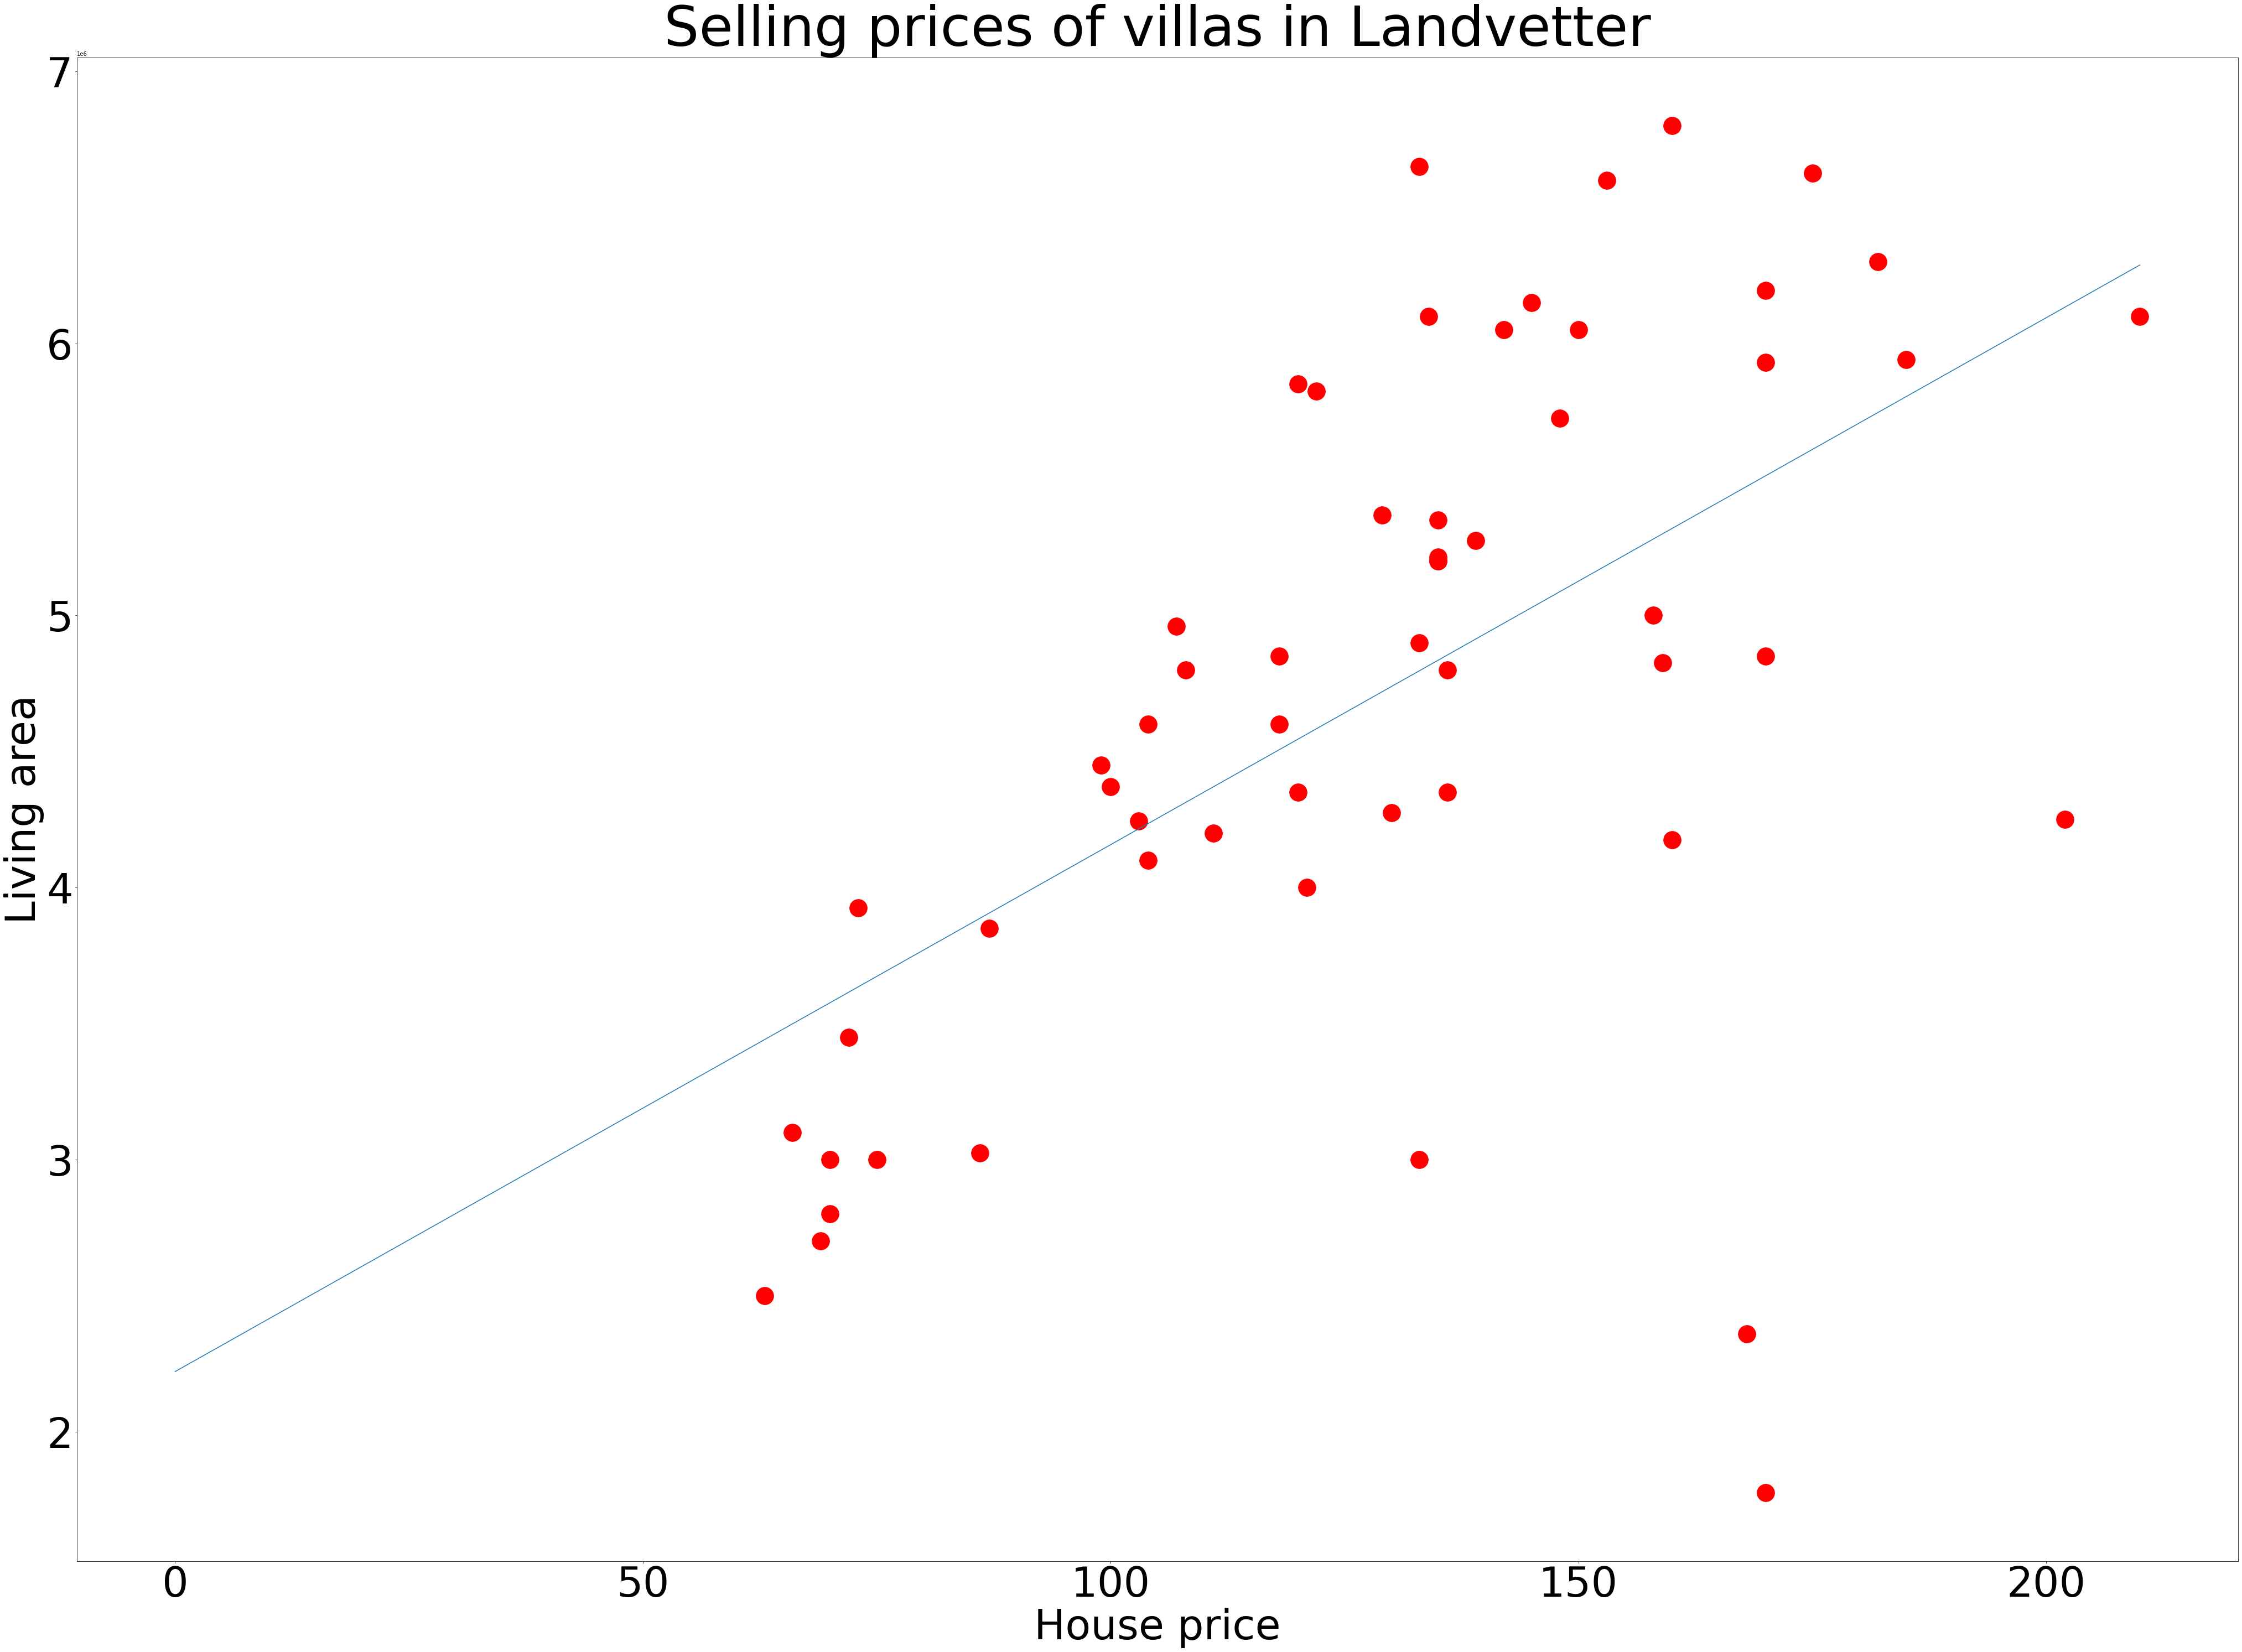

In [208]:
fig, ax = plt.subplots(figsize=(70, 50))

ax.set_title('Selling prices of villas in Landvetter', size=100)
ax.set_xlabel('House price', size=75)
ax.set_ylabel('Living area', size=75)
ax.tick_params(axis='x', labelsize=75)
ax.tick_params(axis='y', labelsize=75)

array = df.to_numpy()
x = array[:, 0]
y = array[:, 1]
ax.scatter(x, y)

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x[:, np.newaxis], y)
n = array[:, 0].max()
xfit = np.array([0, n])
yfit = model.predict(xfit[:, np.newaxis])
ax.scatter(x, y, s=1000, c='r')
ax.plot(xfit, yfit);

b. What are the values of the slope and intercept of the regression line?

In [209]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

print("Slope = ", model.coef_)
print("Intercept = ", model.intercept_)

Slope =  [19370.14]
Intercept =  2220603.243355869


c. Use this model to predict the selling prices of houses which have living area 
100 m2, 150 m2 and 200 m2.

In [210]:
model.predict([[100],[150],[200]])

array([4157617.1 , 5126124.03, 6094630.95])

d. Draw a residual plot.

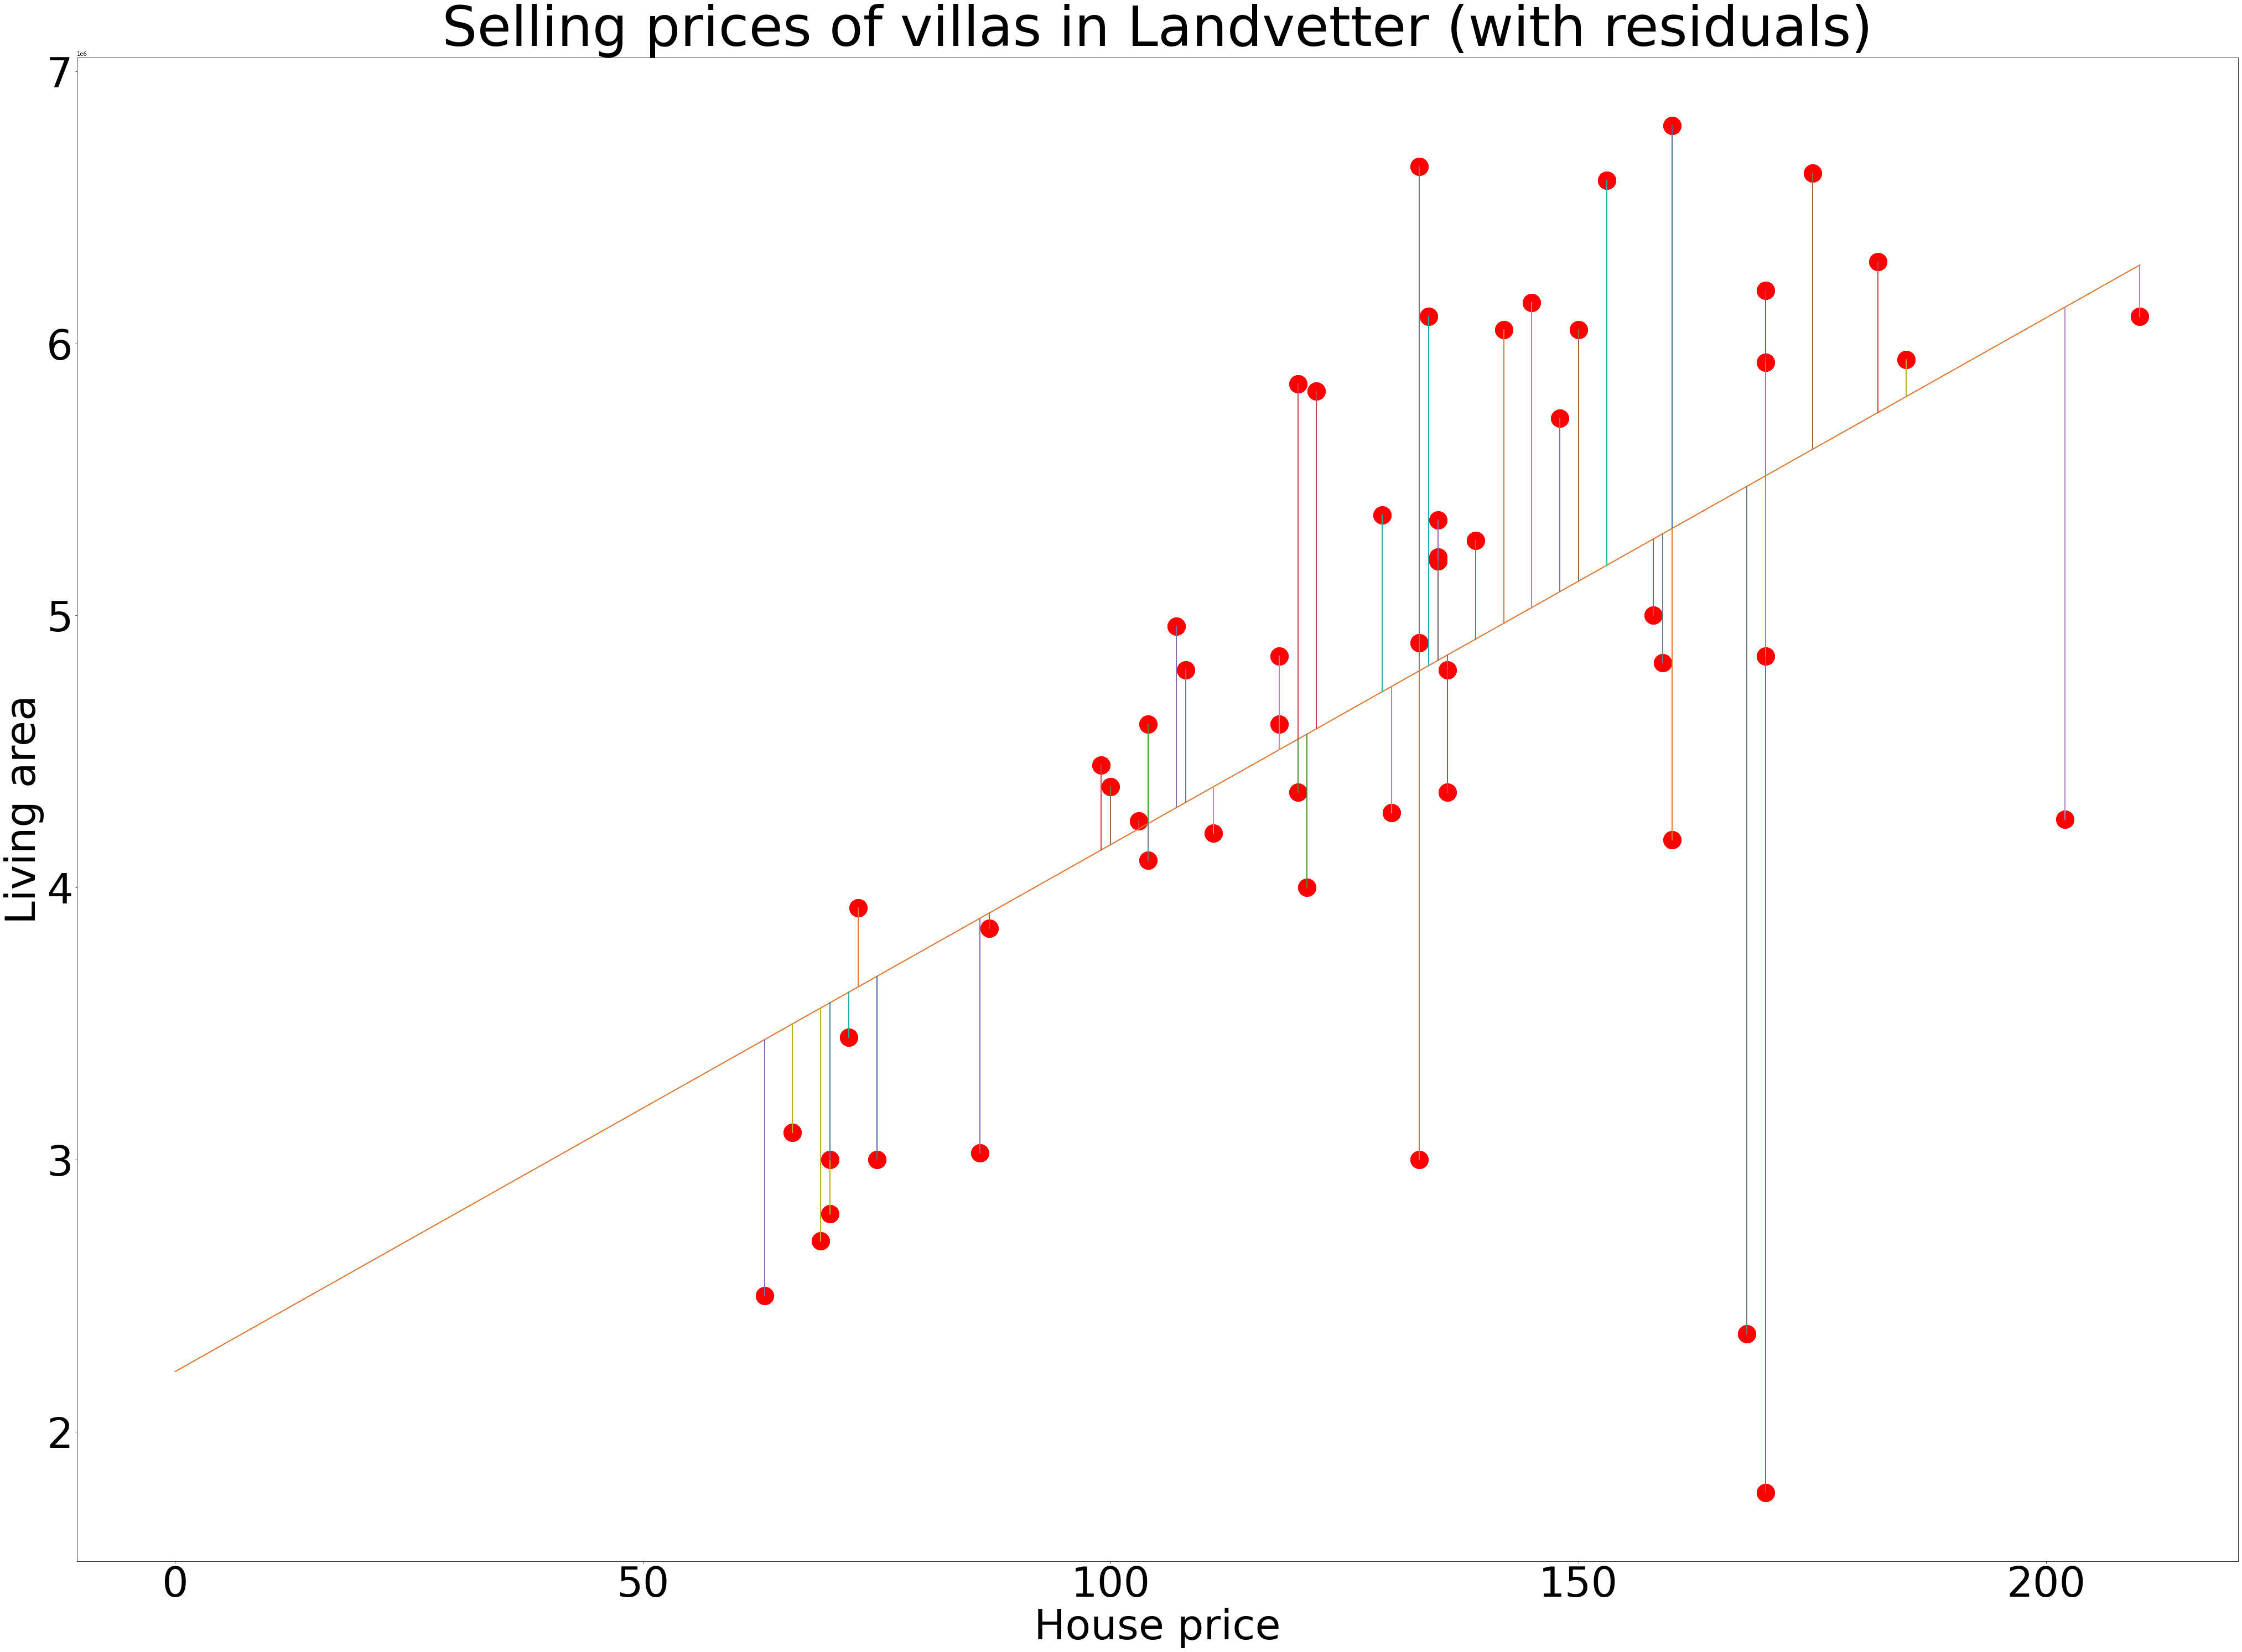

In [211]:
fig, ax = plt.subplots(figsize=(70, 50))

ax.set_title('Selling prices of villas in Landvetter (with residuals)', size=100)
ax.set_xlabel('House price', size=75)
ax.set_ylabel('Living area', size=75)
ax.tick_params(axis='x', labelsize=75)
ax.tick_params(axis='y', labelsize=75)

for i in range(4):
    model.fit(x[:, np.newaxis], y)
    n = array[:, 0].max()
    xfit = np.array([0, n])
    yfit = model.predict(xfit[:, np.newaxis])
    ax.scatter(x, y, s=1000, c='r')
    ax.plot(xfit, yfit)
    
    yPredicted = model.predict(x[:, np.newaxis])
    
    for j in range(len(x)):
        lineXdata = (x[j], x[j])
        lineYdata = (y[j], yPredicted[j])
        ax.plot(lineXdata, lineYdata)

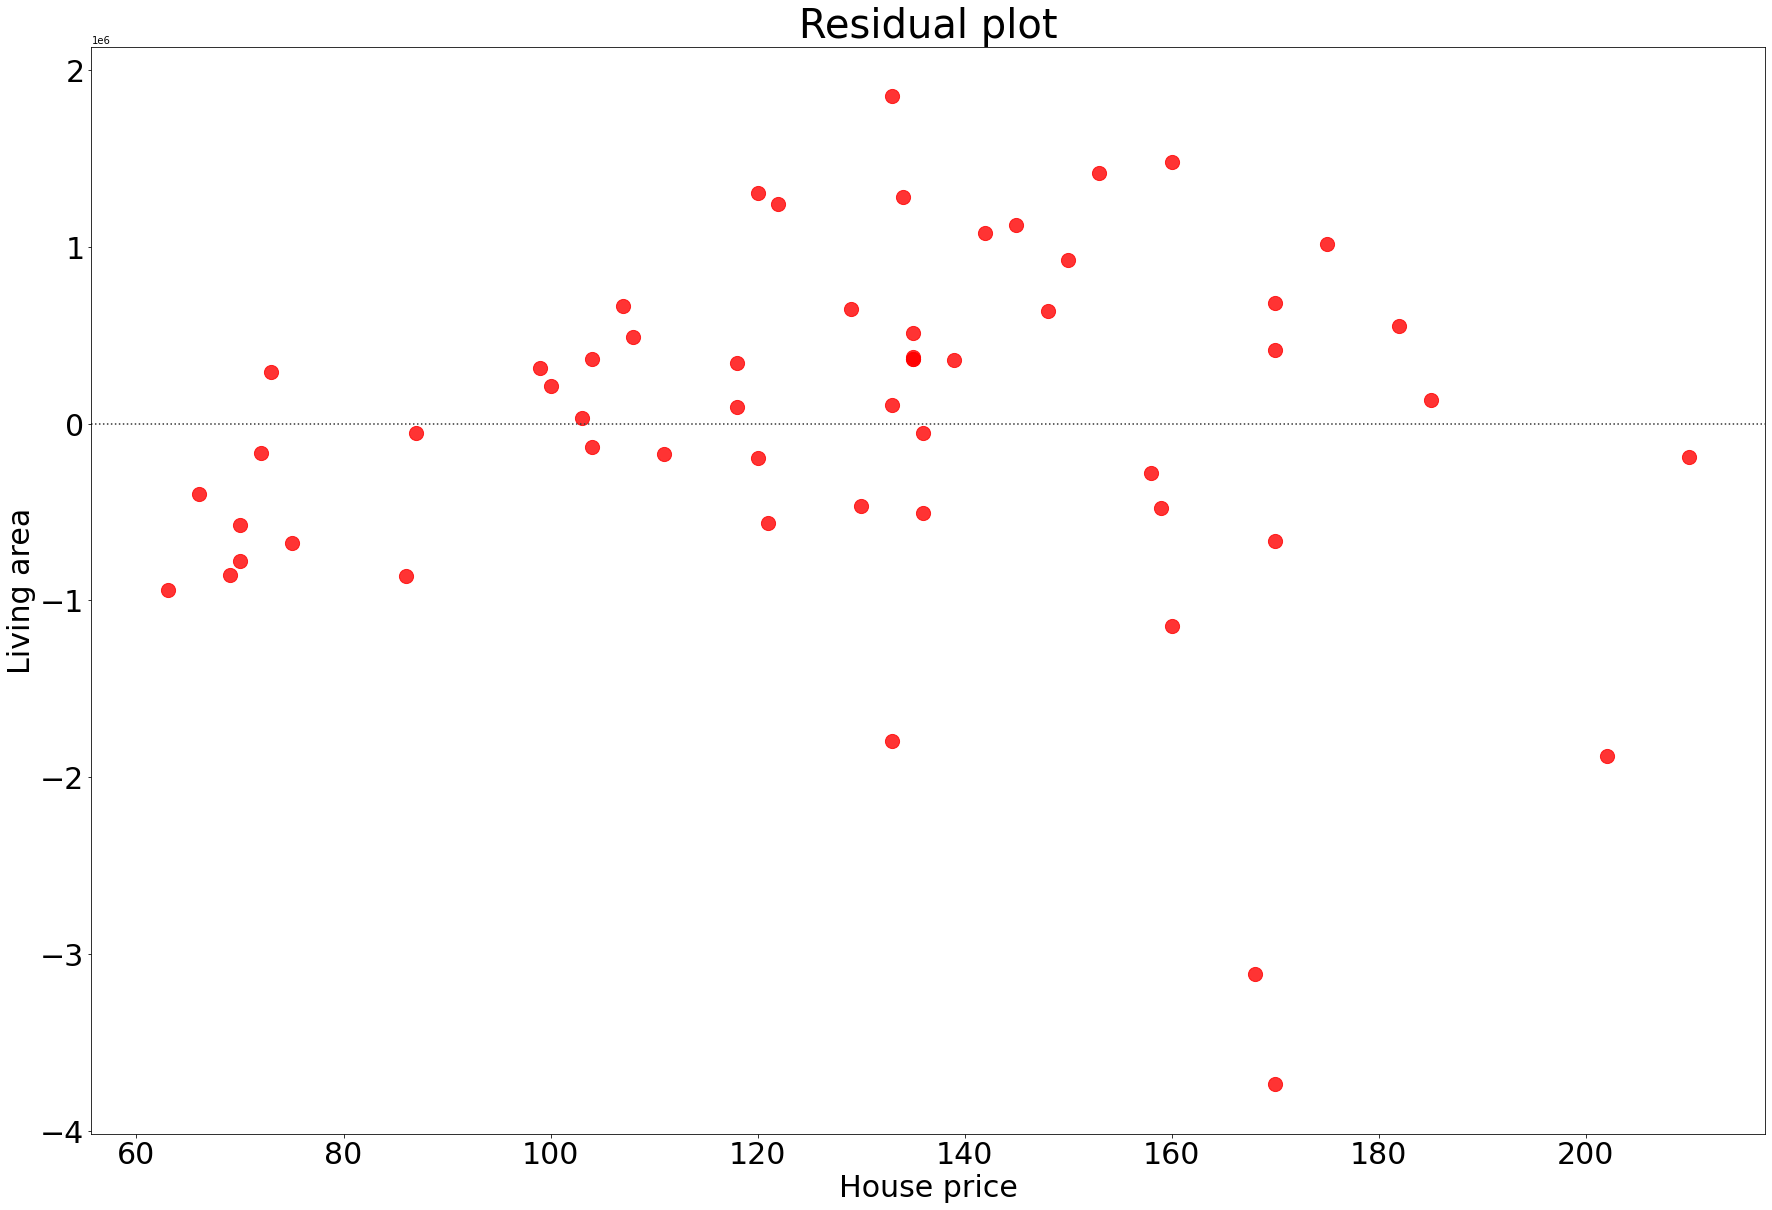

In [212]:
fig, ax = plt.subplots(figsize=(30, 20))

ax.set_title('Residual plot', size=40)
ax.set_xlabel('House price', size=30)
ax.set_ylabel('Living area', size=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
sns.residplot(x=array[:, 0], y=array[:, 1], scatter_kws={"s": 200}, color='red')
plt.show()

In [213]:
#Ridge regularization
ridge_model = linear_model.Ridge(alpha=0.5)
ridge_model.fit(x.reshape(-1,1), y)
(ridge_model.coef_,ridge_model.intercept_)

(array([19370.]), 2220620.7208247273)

In [214]:
#Lasso regularization
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(x.reshape(-1,1), y)
(lasso_model.coef_,lasso_model.intercept_)

(array([19370.14]), 2220603.25346158)

In [215]:
#Removing outliers
array_new = np.delete(array, [40, 45], 0)

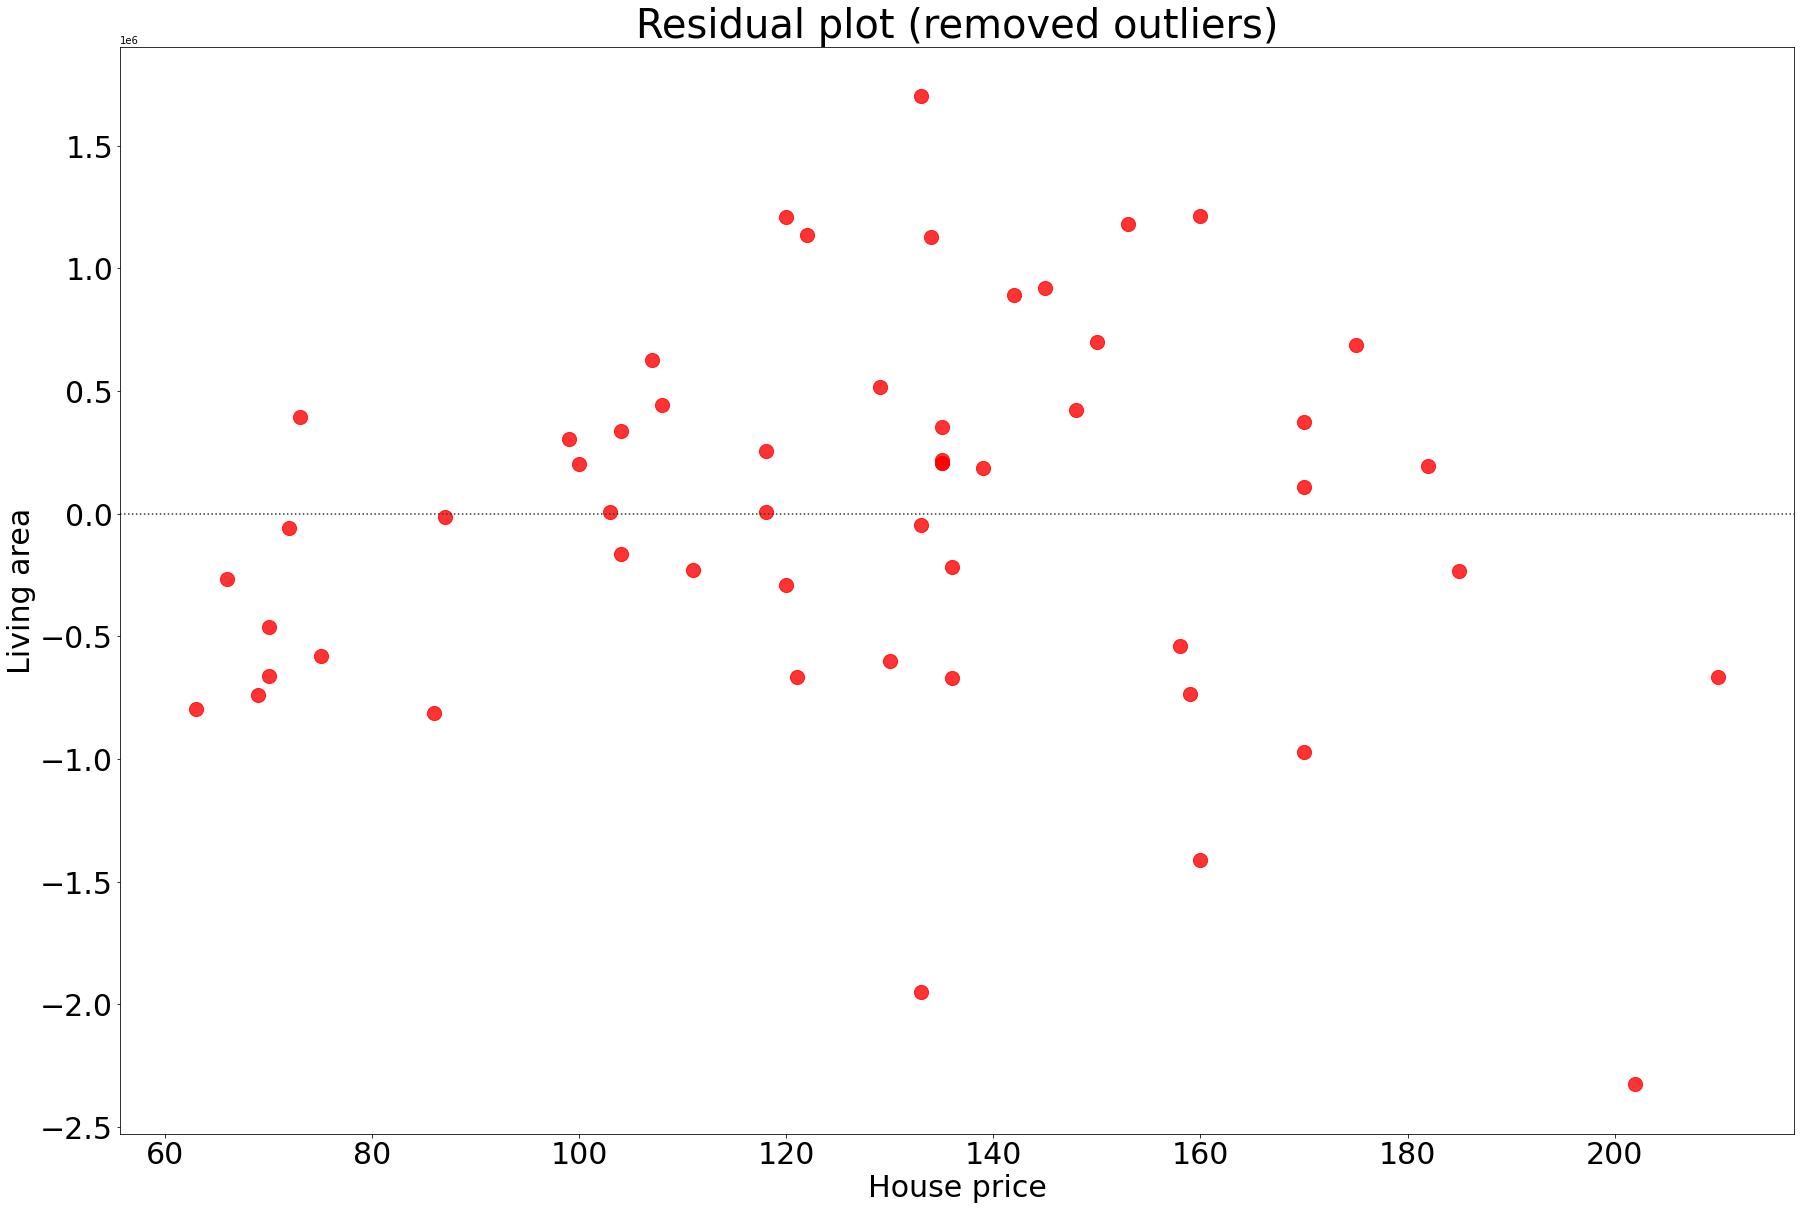

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [219]:

fig, ax = plt.subplots(figsize=(30, 20))

ax.set_title('Residual plot (removed outliers)', size=40)
ax.set_xlabel('House price', size=30)
ax.set_ylabel('Living area', size=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
sns.residplot(x=array_new[:, 0],y=array_new[:, 1], scatter_kws={"s": 200}, color='red')
plt.show()

new_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

print("Slope = ", new_model.coef_)
print("Intercept = ", new_model.intercept_)

e. Discuss the results, and how the model could be improved.

If a couple of houses tell a different story, deviating from the regression line, then there might be more factors that we are missing out. The selling price of a house could be decided on more then just the living area. Number of rooms, location, accessibility, recent renovations, the current housing market and more might also play a hand in the final price. If a realestate agent were to use this model for pricing houses in general then the actual outcome could differ immensely. By using multi-dimensional data one could more likely give a better estimate of a certain house and build a stronger case for causality.